In [1]:
import numpy as np
import scipy.stats as stats
from scipy.stats import skew, kurtosis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy.signal import find_peaks
from matplotlib.font_manager import FontProperties
from matplotlib.lines import Line2D
from matplotlib.ticker import MaxNLocator

from matplotlib.patches import Patch

In [2]:
data= pd.read_csv("../../données/segmentation/data_matrix_grandchallenge_all.csv", sep= ";")

In [3]:
results=[]
metrics=data['score'].unique()
for score in metrics:
    df=data[data['score']==score]
    print(score)
    algos=df['alg_name'].unique()
    score=df['score'].unique()[0]
    count_total=0
    for alg in algos:

        df_alg= df[df['alg_name']==alg]
        tasks = df_alg['subtask'].unique()
        for task in tasks:
            if score=='cldice' and task not in  ['Task08_HepaticVessel_L1','Task08_HepaticVessel_L2']:
                print(task)
                continue 
            else:
                values = df_alg[df_alg['subtask'] == task]['value'].dropna()
                if len(values)<50:
                    continue
                count_total+=1
                kde = gaussian_kde(values, bw_method='scott')
                x_vals = np.linspace(min(values), max(values), 1000)
                density  = kde(x_vals)
                peaks, properties = find_peaks(density)
                heights=density[peaks]
                value={
                'Metric':score,
                'algorithm': alg,
                'subtask': task,
                'skewness': skew(values),
                'kurtosis': kurtosis(values, fisher=False),
                'Mean': np.mean(values), 
                'Standard error': np.std(values, ddof=1),
                'mode': len(peaks),
                "total_number": count_total
                }  
    
                results.append(value)
    
    


boundary_iou
assd
cldice
Task01_BrainTumour_L1
Task01_BrainTumour_L2
Task01_BrainTumour_L3
Task02_Heart_L1
Task03_Liver_L1
Task03_Liver_L2
Task04_Hippocampus_L1
Task04_Hippocampus_L2
Task05_Prostate_L1
Task05_Prostate_L2
Task06_Lung_L1
Task07_Pancreas_L1
Task07_Pancreas_L2
Task09_Spleen_L1
Task10_Colon_L1
Task01_BrainTumour_L1
Task01_BrainTumour_L2
Task01_BrainTumour_L3
Task02_Heart_L1
Task03_Liver_L1
Task03_Liver_L2
Task04_Hippocampus_L1
Task04_Hippocampus_L2
Task05_Prostate_L1
Task05_Prostate_L2
Task06_Lung_L1
Task07_Pancreas_L1
Task07_Pancreas_L2
Task09_Spleen_L1
Task10_Colon_L1
Task01_BrainTumour_L1
Task01_BrainTumour_L2
Task01_BrainTumour_L3
Task02_Heart_L1
Task03_Liver_L1
Task03_Liver_L2
Task04_Hippocampus_L1
Task04_Hippocampus_L2
Task05_Prostate_L1
Task05_Prostate_L2
Task06_Lung_L1
Task07_Pancreas_L1
Task07_Pancreas_L2
Task09_Spleen_L1
Task10_Colon_L1
Task01_BrainTumour_L1
Task01_BrainTumour_L2
Task01_BrainTumour_L3
Task02_Heart_L1
Task03_Liver_L1
Task03_Liver_L2
Task04_Hippocam

In [4]:
results_df= pd.DataFrame(results)

In [5]:
for score in metrics: 
    mask = results_df['Metric'] == score
    max_val = results_df.loc[mask, 'total_number'].max()
    results_df.loc[mask, 'total_number'] = max_val

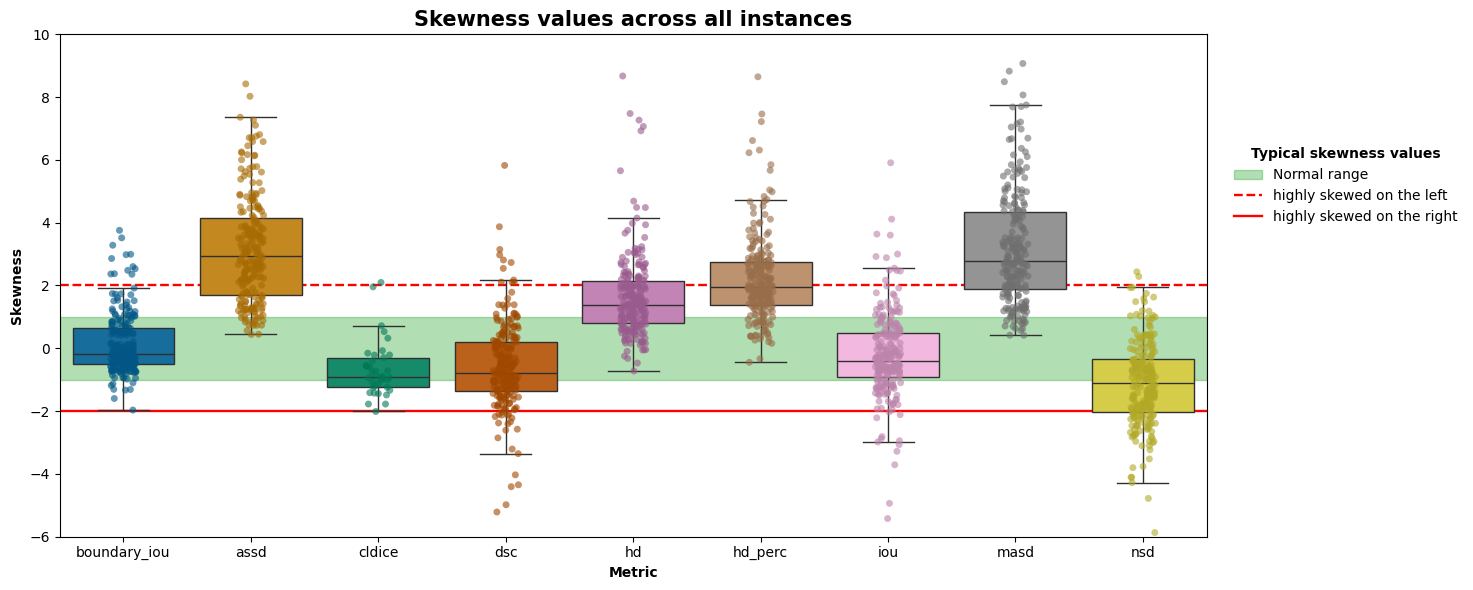

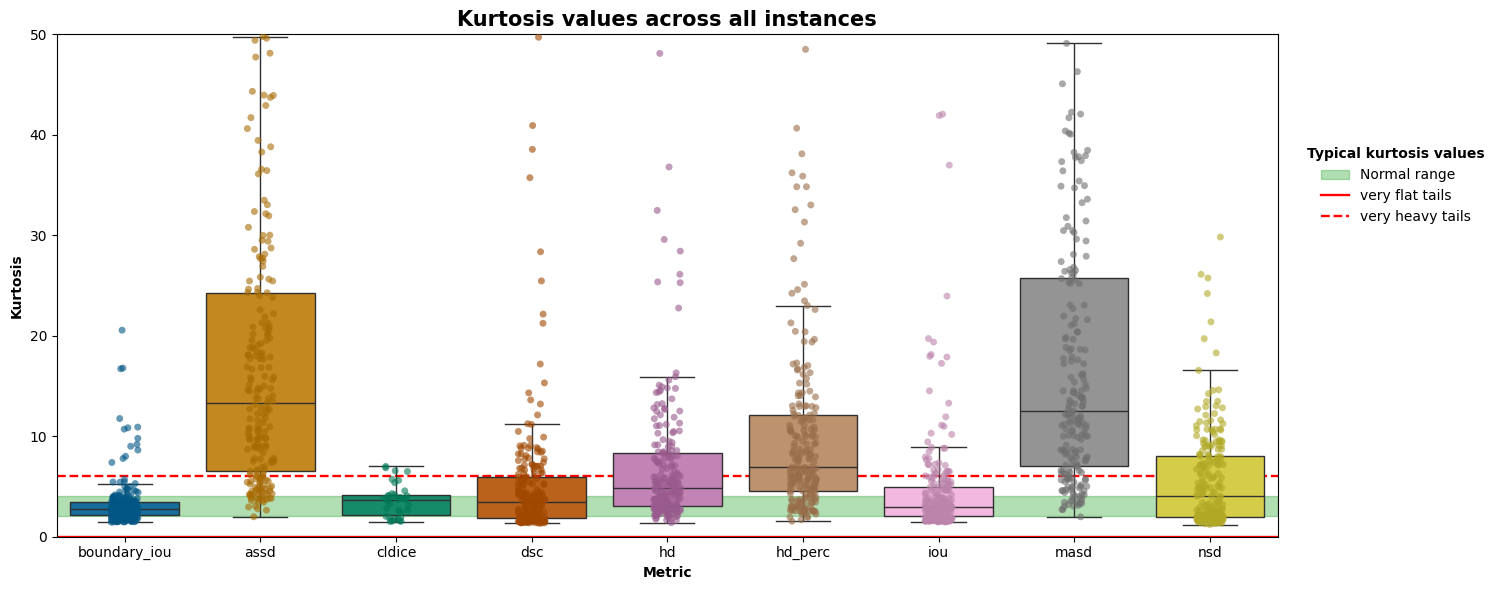

In [6]:


# Melt skewness and kurtosis into one column "Value" and one column "Statistic"


plt.rcdefaults()
sns.reset_defaults()

palette = sns.color_palette("colorblind", len(metrics))
color_dict = dict(zip(metrics, palette))
def darken_color(color, amount=0.8):
    return tuple(min(max(c * amount, 0), 1) for c in color)

dark_color_dict = {k: darken_color(v, 0.75) for k, v in color_dict.items()}

# Plot Skewness
plt.figure(figsize=(15, 6))
plt.axhspan(-1, 1, color='#009409', alpha=0.3, label='Normal range')
plt.axhline(2, color='red', linestyle='--', label='highly skewed on the left', linewidth=1.7)
plt.axhline(-2, color='red', linestyle='-',label='highly skewed on the right',linewidth=1.7)
ax=sns.boxplot(x='Metric', y='skewness', data=results_df,  hue='Metric',showfliers=False,palette=color_dict,linewidth=1)
sns.stripplot(x='Metric', y='skewness', data=results_df, hue='Metric', jitter=True, alpha=0.6,palette=dark_color_dict,legend=False)

plt.legend(title="Typical skewness values",
        loc='upper right',
        frameon=False,
        fontsize=10,
        title_fontproperties=FontProperties(weight='bold'),
        bbox_to_anchor=(1.23, 0.8)
    )
for i, metric in enumerate(metrics):
    data = results_df[results_df['Metric'] == metric]['skewness'].dropna()
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    upper_whisker = data[data <= q3 + 1.5 * iqr].max()
    total = results_df[results_df['Metric'] == metric]['total_number'].iloc[0]
    #plt.text(i, upper_whisker + 0.5, f'n={total}', ha='center', fontsize=10, fontweight='bold')

plt.title('Skewness values across all instances',weight='bold',fontsize=15)
plt.ylabel('Skewness',weight='bold')
plt.xlabel('Metric',weight='bold')
plt.tight_layout()
plt.ylim(-6,10)
plt.show()

# Plot Kurtosis
plt.figure(figsize=(15, 6))
plt.axhspan(2, 4, color='#009409', alpha=0.3, label='Normal range')
plt.axhline(0, color='red', linestyle='-', label='very flat tails',linewidth=1.7)
plt.axhline(6, color='red', linestyle='--', label='very heavy tails',linewidth=1.7)
sns.boxplot(x='Metric', y='kurtosis', hue='Metric', data=results_df, showfliers=False,palette=color_dict)
sns.stripplot(x='Metric', y='kurtosis', data=results_df, hue='Metric', color='black', jitter=True, alpha=0.6,palette=dark_color_dict,)

plt.legend(title="Typical kurtosis values",
        loc='upper right',
        frameon=False,
        fontsize=10,
        title_fontproperties=FontProperties(weight='bold'),
        bbox_to_anchor=(1.18, 0.8),
       
    )
for i, metric in enumerate(metrics):
    data = results_df[results_df['Metric'] == metric]['kurtosis'].dropna()
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    upper_whisker = data[data <= q3 + 1.5 * iqr].max()
    total = results_df[results_df['Metric'] == metric]['total_number'].iloc[0]
    #plt.text(i, upper_whisker + 0.5, f'n={total}', ha='center', fontsize=10, fontweight='bold')

plt.title('Kurtosis values across all instances',weight='bold', fontsize=15)
plt.ylabel('Kurtosis',weight='bold')
plt.ylim(0,50)
plt.xlabel('Metric',weight='bold')
plt.tight_layout()
plt.show()




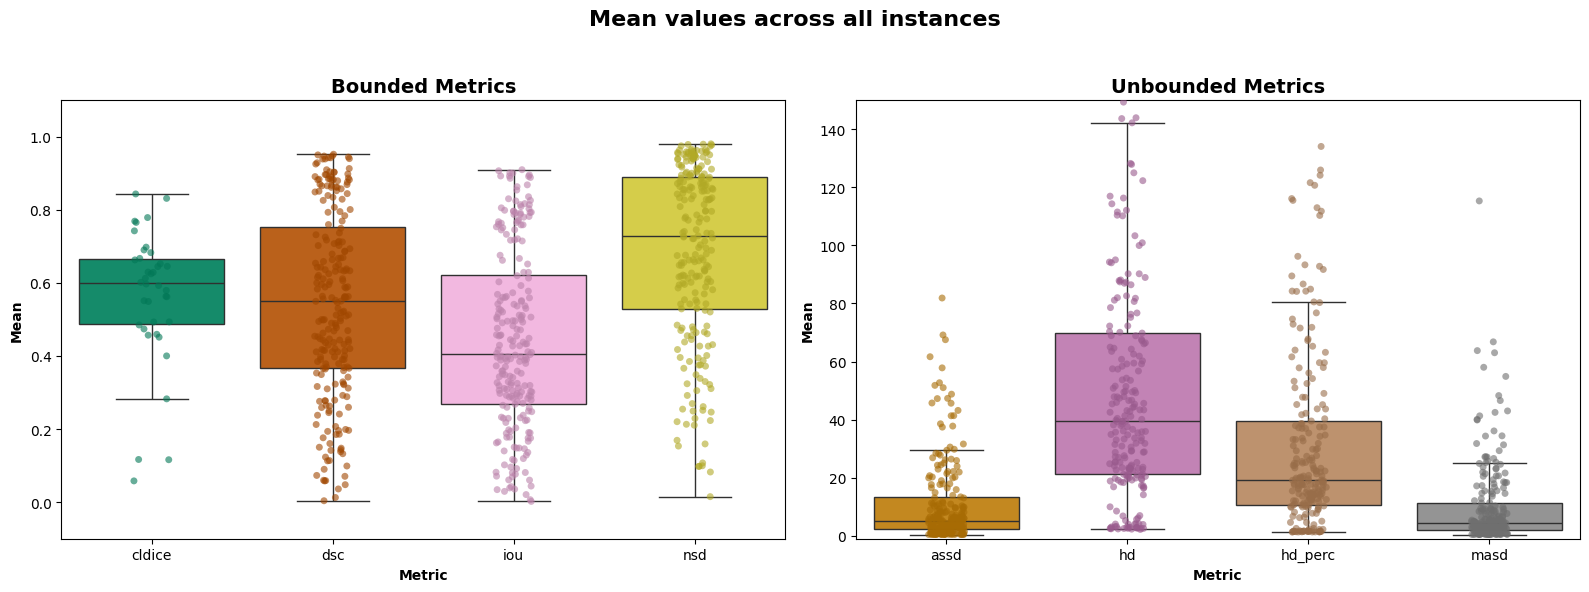

In [7]:
bounded_metrics = ['cldice', 'boundary iou', 'iou', 'dsc', 'nsd']
unbounded_metrics = ['hd', 'hd_perc', 'masd', 'assd']

# Create subset dataframes
df_bounded = results_df[results_df['Metric'].isin(bounded_metrics)]
df_unbounded = results_df[results_df['Metric'].isin(unbounded_metrics)]

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# ----- Plot 1: Bounded -----
ax1 = axes[0]
sns.boxplot(ax=ax1, x='Metric', y='Mean', hue='Metric', data=df_bounded, showfliers=False,
            palette=color_dict, linewidth=1)
sns.stripplot(ax=ax1, x='Metric', y='Mean', data=df_bounded,
              hue='Metric', jitter=True, alpha=0.6,
              palette=dark_color_dict, legend=False)

ax1.set_title('Bounded Metrics', weight='bold', fontsize=14)
ax1.set_xlabel('Metric', weight='bold')
ax1.set_ylabel('Mean', weight='bold')
ax1.set_ylim(-0.1,1.1)
# ----- Plot 2: Unbounded -----
ax2 = axes[1]
sns.boxplot(ax=ax2, x='Metric', y='Mean', data=df_unbounded,
            hue='Metric', showfliers=False,
            palette=color_dict, linewidth=1)
sns.stripplot(ax=ax2, x='Metric', y='Mean', data=df_unbounded,
              hue='Metric', jitter=True, alpha=0.6,
              palette=dark_color_dict, legend=False)

ax2.set_title('Unbounded Metrics', weight='bold', fontsize=14)
ax2.set_xlabel('Metric', weight='bold')
ax2.set_ylabel('Mean', weight='bold')
ax2.set_ylim(-1,150)
# Add global title and layout adjustments
fig.suptitle('Mean values across all instances', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

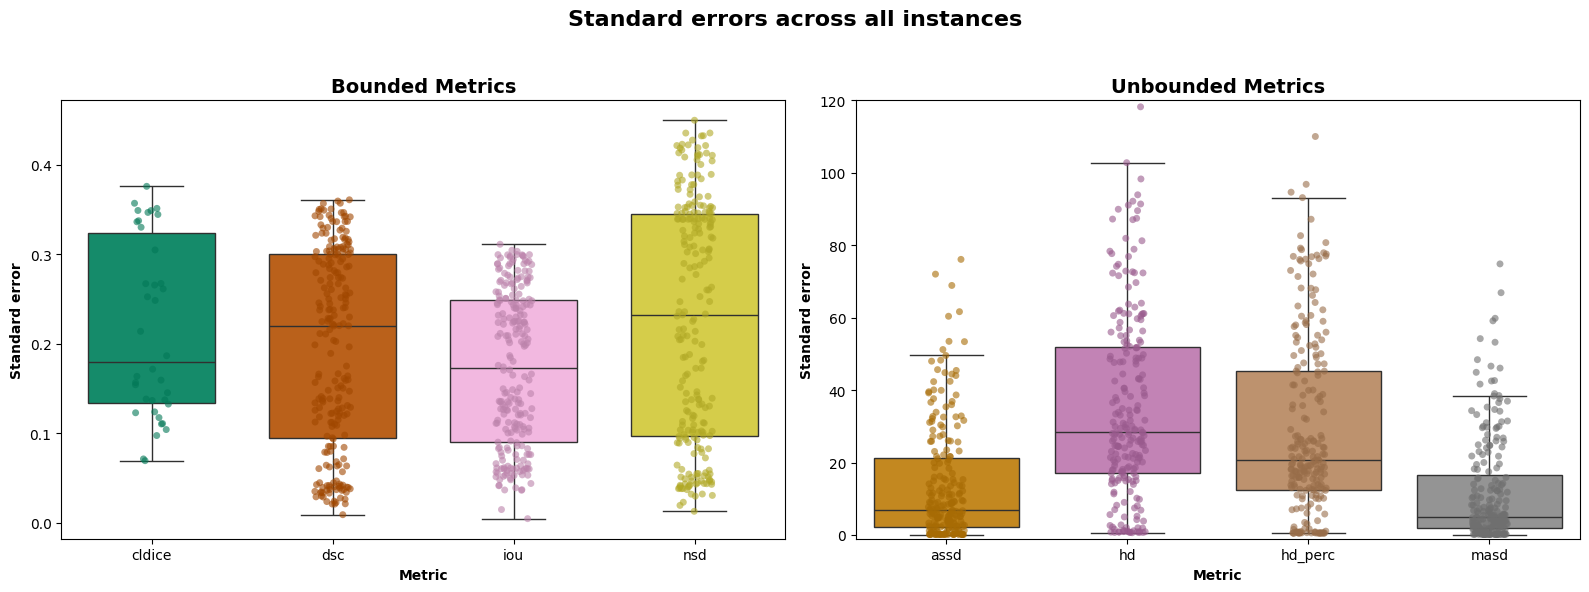

In [8]:
bounded_metrics = ['cldice', 'boundary iou', 'iou', 'dsc', 'nsd']
unbounded_metrics = ['hd', 'hd_perc', 'masd', 'assd']

# Create subset dataframes
df_bounded = results_df[results_df['Metric'].isin(bounded_metrics)]
df_unbounded = results_df[results_df['Metric'].isin(unbounded_metrics)]

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# ----- Plot 1: Bounded -----
ax1 = axes[0]
sns.boxplot(ax=ax1, x='Metric', y='Standard error', data=df_bounded,
            hue='Metric', showfliers=False,
            palette=color_dict, linewidth=1, width=0.7)
sns.stripplot(ax=ax1, x='Metric', y='Standard error', data=df_bounded,
              hue='Metric', jitter=True, alpha=0.6,
              palette=dark_color_dict, legend=False)

ax1.set_title('Bounded Metrics', weight='bold', fontsize=14)
ax1.set_xlabel('Metric', weight='bold')
ax1.set_ylabel('Standard error', weight='bold')

# ----- Plot 2: Unbounded -----
ax2 = axes[1]
sns.boxplot(ax=ax2, x='Metric', y='Standard error', data=df_unbounded,
            hue='Metric', showfliers=False,
            palette=color_dict, linewidth=1)
sns.stripplot(ax=ax2, x='Metric', y='Standard error', data=df_unbounded,
              hue='Metric', jitter=True, alpha=0.6,
              palette=dark_color_dict, legend=False)

ax2.set_title('Unbounded Metrics', weight='bold', fontsize=14)
ax2.set_xlabel('Metric', weight='bold')
ax2.set_ylabel('Standard error', weight='bold')
ax2.set_ylim(-1,120)
# Add global title and layout adjustments
fig.suptitle('Standard errors across all instances', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

10.289430773147437


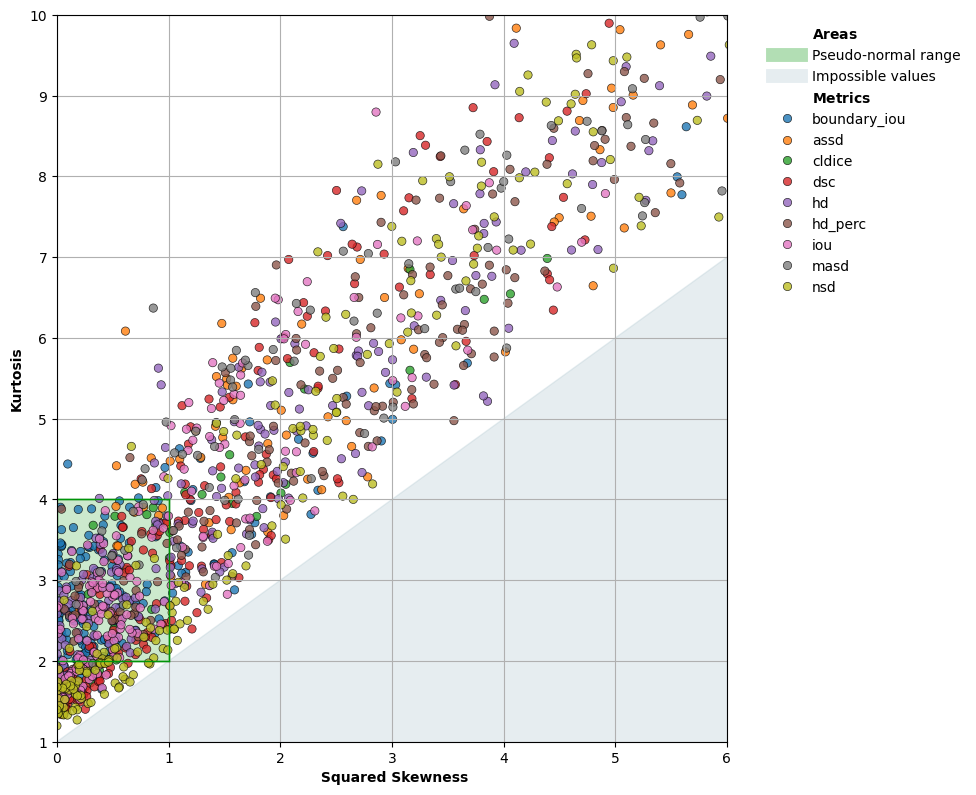

In [9]:

# Assuming `results` is a list of dictionaries like:
# [{'Metric': 'metric1', 'skewness': x1, 'kurtosis': y1}, ...]
results_df = pd.DataFrame(results)
plt.rcdefaults()
sns.reset_defaults()
# Add squared skewness
results_df['squared_skewness'] = results_df['skewness']**2
clean_kurtosis = pd.to_numeric(results_df['kurtosis'], errors='coerce').dropna()
max_kurt= np.percentile(clean_kurtosis,75)
print(max_kurt)
clean_skewness=  pd.to_numeric(results_df['squared_skewness'], errors='coerce').dropna()
max_skew= np.percentile(clean_skewness, 75)

# Plot squared skewness vs kurtosis
plt.figure(figsize=(10, 8))
normal_x_min = 0
normal_x_max = 1
normal_y_min = 2
normal_y_max = 4
plt.fill_betweenx(
    y=[normal_y_min, normal_y_max],
    x1=normal_x_min,
    x2=normal_x_max,
    color='#009409',
    alpha=0.2,
    edgecolor='#009409', 
    linewidth=2
)
x = np.linspace(0, np.max(results_df['squared_skewness']), 100)
y1 = x + 1
y2 = np.zeros(len(x))
x_norm = np.linspace(0, 1, 100)
y_lower = np.full_like(x_norm, 2)
y_upper = np.full_like(x_norm, 4)
plt.plot(x_norm, y_upper, color='#009409', linewidth=1)
plt.plot(x_norm, y_lower, color='#009409', linewidth=1)
plt.plot(np.ones(100), np.linspace(2, 4, 100), color='#009409', linewidth=1)
plt.fill_between(x, y2, y1, where=y1 >= y2, interpolate=True, color='#aec6cf', alpha=0.3)

scatter = sns.scatterplot(
    data=results_df,
    x='squared_skewness',
    y='kurtosis',
    hue='Metric',
    palette='tab10',  # you can change the palette
    alpha=0.8,
    edgecolor='black'
)


# Fill between the lines

# plt.plot(x, y1, color= 'grey',label='Impossible values')
# plt.plot(x,x+1 , color='black')
# plt.plot(x, (3*x/2)+3, color='red')

plt.xlabel(' Squared Skewness',weight='bold')
plt.ylabel('Kurtosis',weight='bold')
plt.grid(True)
area_title = Line2D([], [], color='none', label=r'$\mathbf{Areas}$')
# Dummy handles for metric section title
metric_title = Line2D([], [], color='none', label=r'$\mathbf{Metrics}$')

# Legend handles for areas (manually)
area_handles = [
    Line2D([], [], color='#009409', alpha=0.3, linewidth=10, label='Pseudo-normal range'),
    Line2D([], [], color='#aec6cf', alpha=0.3, linewidth=10, label='Impossible values')
]

# Legend handles for metrics (auto from Seaborn)
metric_handles, metric_labels = scatter.get_legend_handles_labels()

# Final handles and labels for legend
all_handles = [area_title] + area_handles + [metric_title] + metric_handles
all_labels = [h.get_label() for h in all_handles]

# Add combined legend
plt.legend(
    handles=all_handles,
    labels=all_labels,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=10,
    frameon=False,

)

plt.tight_layout()
plt.ylim(1,np.round(max_kurt))
plt.xlim(0,np.round(max_skew))
plt.show()


10.289430773147437


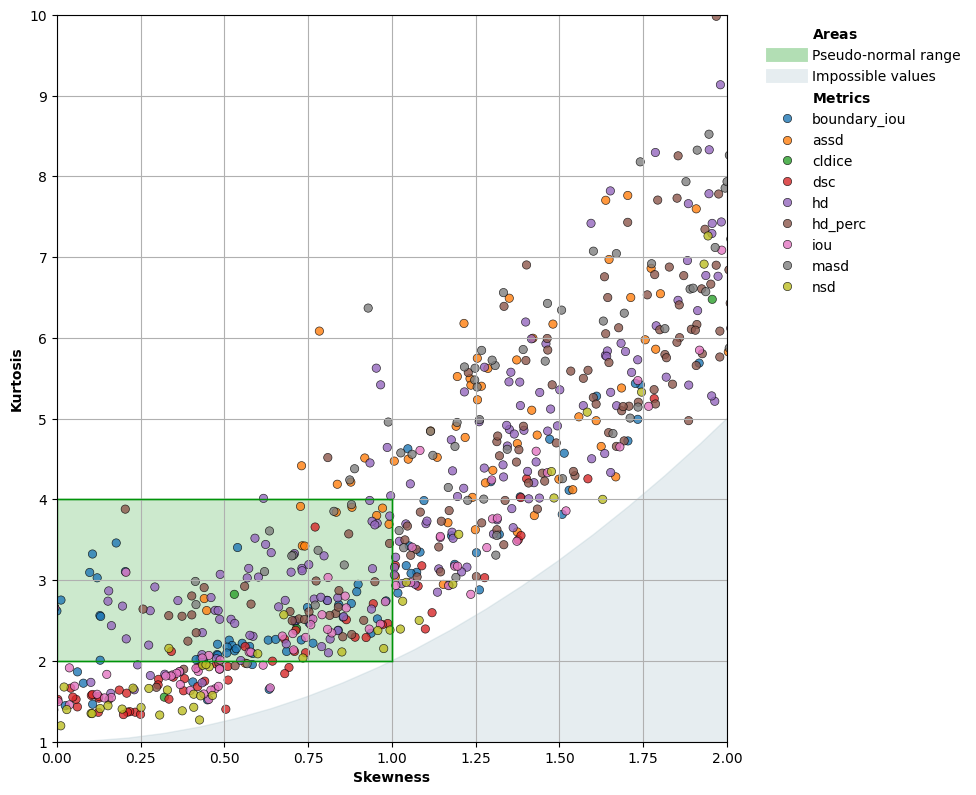

In [10]:

# Assuming `results` is a list of dictionaries like:
# [{'Metric': 'metric1', 'skewness': x1, 'kurtosis': y1}, ...]
results_df = pd.DataFrame(results)
plt.rcdefaults()
sns.reset_defaults()
# Add squared skewness

clean_kurtosis = pd.to_numeric(results_df['kurtosis'], errors='coerce').dropna()
max_kurt= np.percentile(clean_kurtosis,75)
print(max_kurt)
clean_skewness=  pd.to_numeric(results_df['skewness'], errors='coerce').dropna()
max_skew= np.percentile(clean_skewness, 75)

# Plot squared skewness vs kurtosis
plt.figure(figsize=(10, 8))
normal_x_min = 0
normal_x_max = 1
normal_y_min = 2
normal_y_max = 4
plt.fill_betweenx(
    y=[normal_y_min, normal_y_max],
    x1=normal_x_min,
    x2=normal_x_max,
    color='#009409',
    alpha=0.2,
    edgecolor='#009409', 
    linewidth=2
)
x = np.linspace(0, np.max(results_df['skewness']), 100)
y1 = x**2 + 1
y2 = np.zeros(len(x))
x_norm = np.linspace(0, 1, 100)
y_lower = np.full_like(x_norm, 2)
y_upper = np.full_like(x_norm, 4)
plt.plot(x_norm, y_upper, color='#009409', linewidth=1)
plt.plot(x_norm, y_lower, color='#009409', linewidth=1)
plt.plot(np.ones(100), np.linspace(2, 4, 100), color='#009409', linewidth=1)
plt.fill_between(x, y2, y1, where=y1 >= y2, interpolate=True, color='#aec6cf', alpha=0.3)

scatter = sns.scatterplot(
    data=results_df,
    x='skewness',
    y='kurtosis',
    hue='Metric',
    palette='tab10',  # you can change the palette
    alpha=0.8,
    edgecolor='black'
)


# Fill between the lines

# plt.plot(x, y1, color= 'grey',label='Impossible values')
# plt.plot(x,x+1 , color='black')
# plt.plot(x, (3*x/2)+3, color='red')

plt.xlabel('Skewness',weight='bold')
plt.ylabel('Kurtosis',weight='bold')
plt.grid(True)
area_title = Line2D([], [], color='none', label=r'$\mathbf{Areas}$')
# Dummy handles for metric section title
metric_title = Line2D([], [], color='none', label=r'$\mathbf{Metrics}$')

# Legend handles for areas (manually)
area_handles = [
    Line2D([], [], color='#009409', alpha=0.3, linewidth=10, label='Pseudo-normal range'),
    Line2D([], [], color='#aec6cf', alpha=0.3, linewidth=10, label='Impossible values')
]

# Legend handles for metrics (auto from Seaborn)
metric_handles, metric_labels = scatter.get_legend_handles_labels()

# Final handles and labels for legend
all_handles = [area_title] + area_handles + [metric_title] + metric_handles
all_labels = [h.get_label() for h in all_handles]

# Add combined legend
plt.legend(
    handles=all_handles,
    labels=all_labels,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=10,
    frameon=False,

)

plt.tight_layout()
plt.ylim(1,np.round(max_kurt))
plt.xlim(0,np.round(max_skew))
plt.show()


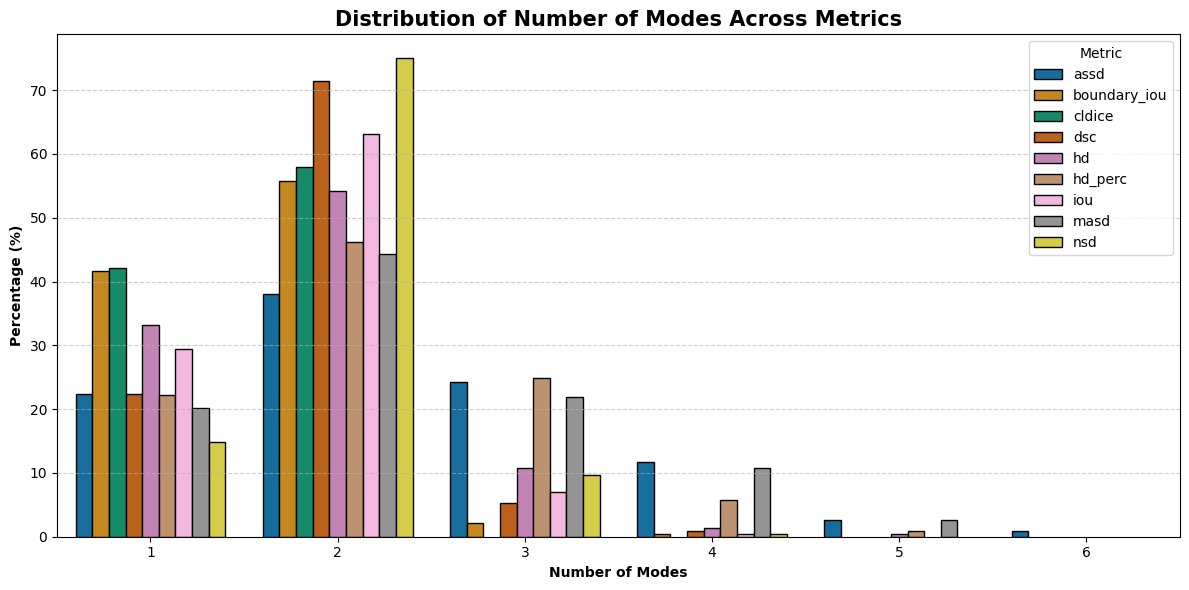

In [11]:


# Assuming results is already a list of dicts with 'Metric' and 'mode'
results_df = pd.DataFrame(results)
results_df['weight'] = 1 / results_df['total_number']
# Set color palette
unique_metrics = results_df['Metric'].unique()
palette = sns.color_palette("colorblind", len(unique_metrics))
color_dict = dict(zip(unique_metrics, palette))
grouped = results_df.groupby(['Metric', 'mode']).size().reset_index(name='count')

# Step 2: Normalize within each metric to get percentages
grouped['percent'] = grouped.groupby('Metric')['count'].transform(lambda x: 100 * x / x.sum())

# Plot histogram: number of modes on x-axis, separate bars for each Metric
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=grouped,
    x='mode',
    y='percent',
    hue='Metric',
    palette='colorblind',
    edgecolor='black'
)
# for container in barplot.containers:
#     for bar in container:
#         height = bar.get_height()
#         if height > 0:
#             barplot.annotate(
#                 f'{height:.1f}%',
#                 xy=(bar.get_x() + bar.get_width() / 2, height),
#                 xytext=(0, 3),  # vertical offset
#                 textcoords='offset points',
#                 ha='center',
#                 fontsize=9,
#                 weight='bold'
#             )

# Formatting
plt.title('Distribution of Number of Modes Across Metrics', weight='bold', fontsize=15)
plt.xlabel('Number of Modes', weight='bold')
plt.ylabel('Percentage (%)', weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Force x-axis to use only integer ticks
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


## Classification

In [12]:
def multivariate_skewness_kurtosis(logits, eps=1e-5):
    X = np.asarray(logits)
    n_samples, d = X.shape

    # Center the data
    X_centered = X - np.mean(X, axis=0)

    # Regularized covariance
    cov = np.cov(X_centered, rowvar=False)
    cov += eps * np.eye(d)
    
    # Use Cholesky to compute whitening matrix
    L = np.linalg.cholesky(cov)
    cov_inv_sqrt = np.linalg.inv(L).T
    X_standardized = X_centered @ cov_inv_sqrt

    # α²: skewness
    alpha_squared = 0.0
    for i in range(d):
        for j in range(d):
            for k in range(d):
                e_ijk = np.mean(X_standardized[:, i] * X_standardized[:, j] * X_standardized[:, k])
                alpha_squared += e_ijk ** 2

    # β*: kurtosis
    norm_squared = np.sum(X_standardized ** 2, axis=1)
    beta_star = np.mean(norm_squared ** 2) 

    return {
        'Skewness': np.sqrt(alpha_squared),
        'Kurtosis': beta_star
    }
def parse_vector_string(vec_str):
    # Remove curly braces and split by comma
    vec_str = vec_str.strip('{}')
    parts = vec_str.split(',')
    # Convert each part to float (strip whitespace just in case)
    return [float(x.strip()) for x in parts]


In [13]:
data= pd.read_csv('../../données/classif/data_matrix_classification.csv')

In [14]:
data

,subtask,alg_name,sample_id,logits,target
0,chexpert_cardiomegaly,alg_1,0,"{-0.1903, 1.539}",0
1,chexpert_cardiomegaly,alg_1,1,"{-0.078, 0.1885}",0
2,chexpert_cardiomegaly,alg_1,2,"{-0.8955, 2.348}",0
3,chexpert_cardiomegaly,alg_1,3,"{1.292, -1.878}",0
4,chexpert_cardiomegaly,alg_1,4,"{-0.6035, -0.4253}",0
...,...,...,...,...,...
783802,hyperkvasir_anatomical-landmarks,alg_19,818,"{2.232, 7.848, -1.586, -4.15, -3.148, -1.659}",5
783803,hyperkvasir_anatomical-landmarks,alg_19,819,"{-0.5786, 0.525, 8.664, -4.17, -2.031, -1.743}",5
783804,hyperkvasir_anatomical-landmarks,alg_19,820,"{-0.0287, 0.538, 8.16, -3.197, -3.84, -1.934}",5
783805,hyperkvasir_anatomical-landmarks,alg_19,821,"{1.473, 7.37, -2.707, -3.715, -2.527, -1.217}",5


In [15]:
metrics_list = []

subtasks=data['subtask'].unique()

for task in subtasks: 
    print(task)
    data_task=data[data['subtask']==task]
    algos=data_task['alg_name'].unique()
    for alg in algos:
        data_alg=data_task[data_task['alg_name']==alg]
        logits=data_alg['logits']
   
        list_of_lists = logits.apply(parse_vector_string).tolist()
        max_len = max(len(vec) for vec in list_of_lists)
        list_of_lists = [vec for vec in list_of_lists if len(vec) == max_len]

        matrix_logits = np.array(list_of_lists)
        
        # Convert list of lists to numpy matrix
       
        stats = multivariate_skewness_kurtosis(matrix_logits)
       
        metrics_list.append({
            "task": task,
            "algo": alg,
            "skewness":stats['Skewness'], 
            "Kurtosis":stats['Kurtosis'], 
            "dimension": matrix_logits.shape[1]
        })
        

chexpert_cardiomegaly
aptos19_blindness_detection
eye_condition_classification
isic20_melanoma_classification
crawled_covid_ct_classification
breast_cancer_classification_v2
chexpert_pleural_effusion
deep_drid_quality
mura_xr_forearm
barretts_esophagus_diagnosis
derm7pt_skin_lesions
hyperkvasir_anatomical-landmarks


In [16]:
df=pd.DataFrame(metrics_list)

In [17]:
df

,task,algo,skewness,Kurtosis,dimension
0,chexpert_cardiomegaly,alg_1,0.571439,7.545420,2
1,chexpert_cardiomegaly,alg_2,0.223041,7.006031,2
2,chexpert_cardiomegaly,alg_3,1.112837,7.784284,2
3,chexpert_cardiomegaly,alg_4,0.720142,8.738004,2
4,chexpert_cardiomegaly,alg_5,0.726151,10.052966,2
...,...,...,...,...,...
223,hyperkvasir_anatomical-landmarks,alg_15,0.000110,0.000167,6
224,hyperkvasir_anatomical-landmarks,alg_16,0.000089,0.000074,6
225,hyperkvasir_anatomical-landmarks,alg_17,4.834398,79.854234,6
226,hyperkvasir_anatomical-landmarks,alg_18,6.037874,93.356452,6


[np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]


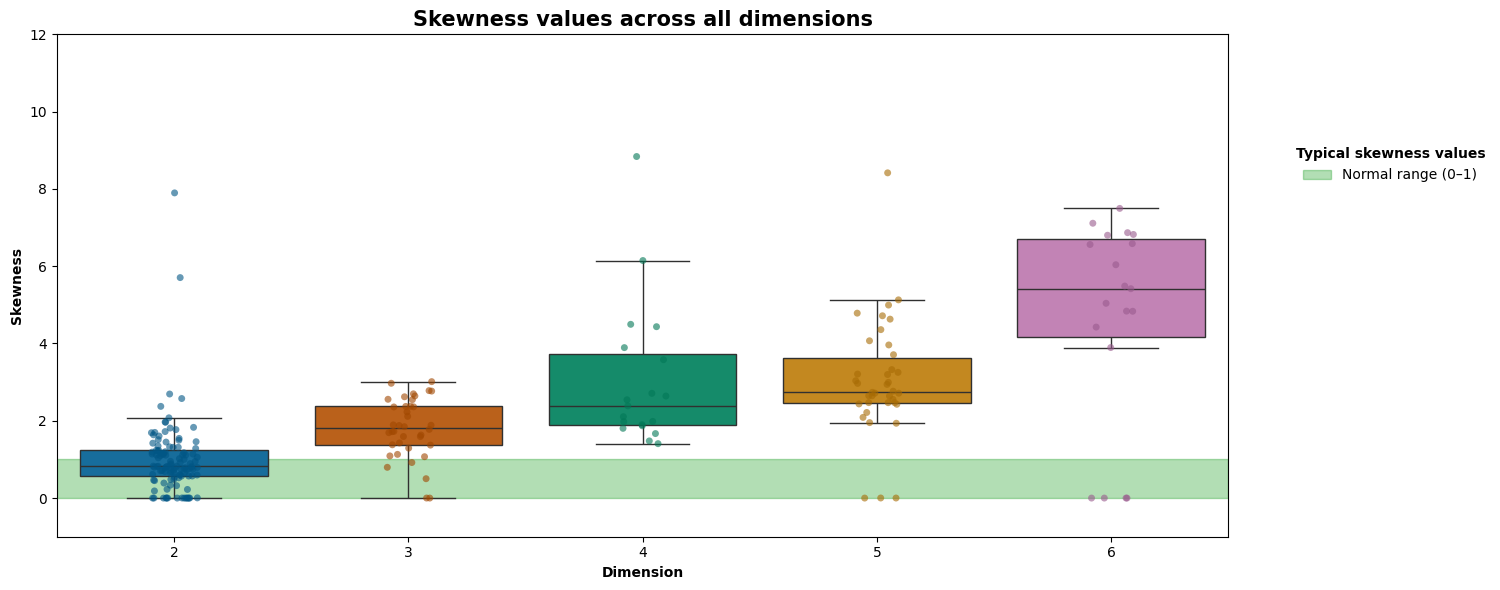

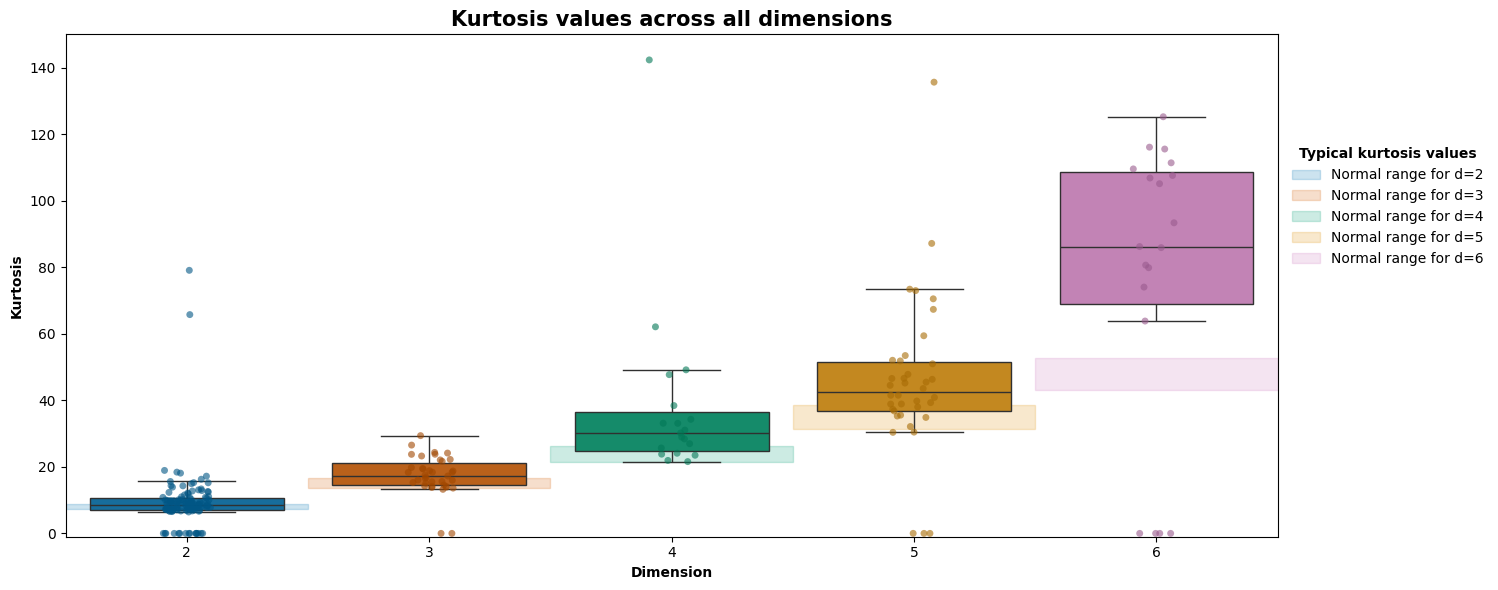

In [18]:
plt.rcdefaults()
sns.reset_defaults()

dimensions = df['dimension'].unique()
dimension_order = sorted(df['dimension'].unique())
print(dimension_order)
palette = sns.color_palette("colorblind", len(dimensions))
color_dict = dict(zip(dimensions, palette))

def darken_color(color, amount=0.8):
    return tuple(min(max(c * amount, 0), 1) for c in color)

dark_color_dict = {k: darken_color(v, 0.75) for k, v in color_dict.items()}

# === Skewness Plot ===
plt.figure(figsize=(15, 6))
plt.axhspan(0, 1, color='#009409', alpha=0.3, label='Normal range (0–1)')

sns.boxplot(x='dimension', y='skewness', data=df, hue='dimension',
            showfliers=False, palette=color_dict, linewidth=1, legend=False, order= dimension_order)
sns.stripplot(x='dimension', y='skewness', data=df, hue='dimension',
              jitter=True, alpha=0.6, palette=dark_color_dict, legend=False, order= dimension_order)

plt.legend(title="Typical skewness values",
        loc='upper right',
        frameon=False,
        fontsize=10,
        title_fontproperties=FontProperties(weight='bold'),
        bbox_to_anchor=(1.23, 0.8)
    )

plt.title('Skewness values across all dimensions', weight='bold', fontsize=15)
plt.ylabel('Skewness', weight='bold')
plt.xlabel('Dimension', weight='bold')
plt.tight_layout()
plt.ylim(-1,12)
plt.show()

# === Kurtosis Plot ===
plt.figure(figsize=(15, 6))

# Plot dynamic normal range [0, d(d+2)] with per-dimension colors
for i, d in enumerate(dimension_order):
    d=int(d)
    d_kurt_max = d * (d + 2)
    band_width = d_kurt_max * 0.1
    plt.axhspan(d_kurt_max-band_width, d_kurt_max+band_width, xmin=(i ) / len(dimensions), xmax=(i + 1) / len(dimensions),
                color=color_dict[d], alpha=0.2, label=f'Normal range for d={d}')


sns.boxplot(x='dimension', y='Kurtosis', data=df, hue='dimension',
            showfliers=False, palette=color_dict, legend=False, order=dimension_order)
sns.stripplot(x='dimension', y='Kurtosis', data=df, hue='dimension',
              jitter=True, alpha=0.6, palette=dark_color_dict, legend=False, order= dimension_order)

plt.legend(title="Typical kurtosis values",
        loc='upper right',
        frameon=False,
        fontsize=10,
        title_fontproperties=FontProperties(weight='bold'),
        bbox_to_anchor=(1.18, 0.8)
    )

plt.title('Kurtosis values across all dimensions', weight='bold', fontsize=15)
plt.ylabel('Kurtosis', weight='bold')
plt.xlabel('Dimension', weight='bold')
plt.ylim(-1,150)
plt.tight_layout()
plt.show()


32.361635573955645
6


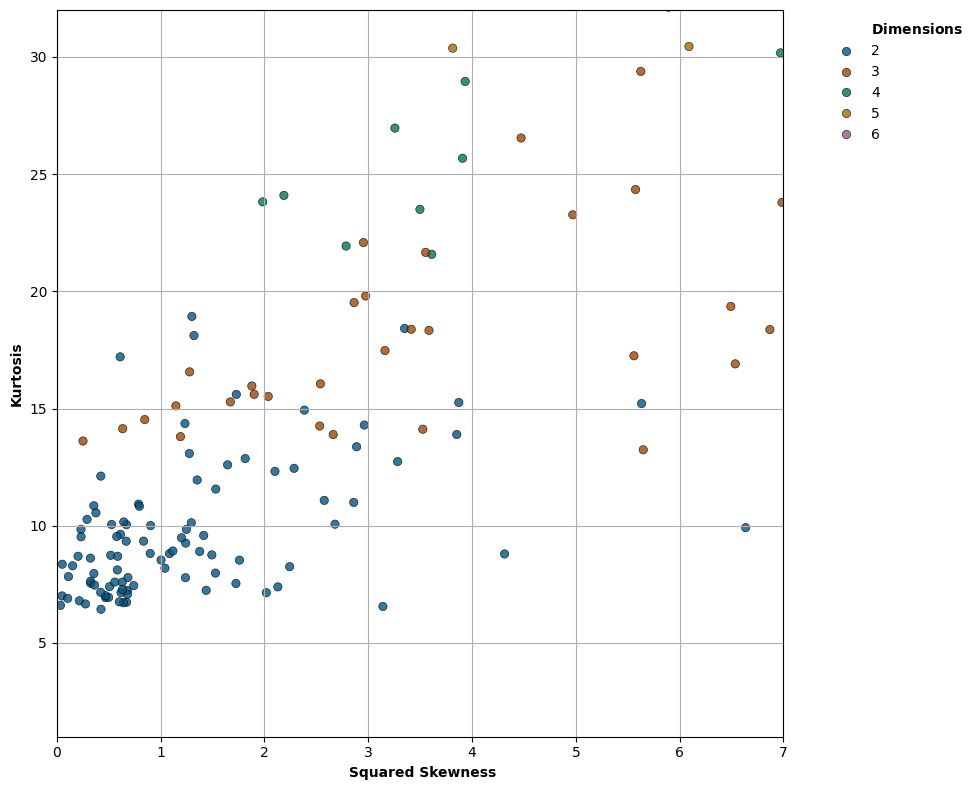

In [19]:

plt.rcdefaults()
sns.reset_defaults()
# Add squared skewness
df['squared_skewness'] = df['skewness']**2
clean_kurtosis = pd.to_numeric(df['Kurtosis'], errors='coerce').dropna()
max_kurt= np.percentile(clean_kurtosis,75)
print(max_kurt)
clean_skewness=  pd.to_numeric(df['squared_skewness'], errors='coerce').dropna()
max_skew= np.percentile(clean_skewness, 75)
max_dim=np.max(df['dimension'])
print(max_dim)
# Plot squared skewness vs kurtosis
plt.figure(figsize=(10, 8))
normal_x_min = 0
normal_x_max = 1
normal_y_min = 2
normal_y_max = 4
# plt.fill_betweenx(
#     y=[normal_y_min, normal_y_max],
#     x1=normal_x_min,
#     x2=normal_x_max,
#     color='#009409',
#     alpha=0.2,
#     edgecolor='#009409', 
#     linewidth=2
# )
x = np.linspace(0, np.max(df['squared_skewness']), 100)
y1 = x -2*max_dim
y2 = np.zeros(len(x))
x_norm = np.linspace(0, 1, 100)
y_lower = np.full_like(x_norm, 2)
y_upper = np.full_like(x_norm, 4)
# plt.plot(x_norm, y_upper, color='#009409', linewidth=1)
# plt.plot(x_norm, y_lower, color='#009409', linewidth=1)
# plt.plot(np.ones(100), np.linspace(2, 4, 100), color='#009409', linewidth=1)
#plt.fill_between(x, y2, y1, where=y1 >= y2, interpolate=True, color='#aec6cf', alpha=0.3)

scatter = sns.scatterplot(
    data=df,
    x='squared_skewness',
    y='Kurtosis',  # you can change the palette
    alpha=0.8,
    edgecolor='black', 
    hue='dimension', 
    palette=dark_color_dict
)


# Fill between the lines

# plt.plot(x, y1, color= 'grey',label='Impossible values')
# plt.plot(x,x+1 , color='black')
# plt.plot(x, (3*x/2)+3, color='red')

plt.xlabel(' Squared Skewness',weight='bold')
plt.ylabel('Kurtosis',weight='bold')
plt.grid(True)
area_title = Line2D([], [], color='none', label=r'$\mathbf{Areas}$')
# Dummy handles for metric section title
metric_title = Line2D([], [], color='none', label=r'$\mathbf{Dimensions}$')

# Legend handles for areas (manually)
area_handles = [
    Line2D([], [], color='#009409', alpha=0.3, linewidth=10, label='Pseudo-normal range'),
    Line2D([], [], color='#aec6cf', alpha=0.3, linewidth=10, label='Impossible values')
]

# Legend handles for metrics (auto from Seaborn)
metric_handles, metric_labels = scatter.get_legend_handles_labels()

# Final handles and labels for legend
# all_handles = [area_title] + area_handles + [metric_title] + metric_handles
all_handles = [metric_title] + metric_handles

all_labels = [h.get_label() for h in all_handles]

# Add combined legend
plt.legend(
    handles=all_handles,
    labels=all_labels,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=10,
    frameon=False,

)

plt.tight_layout()
plt.ylim(1,np.round(max_kurt))
plt.xlim(0,np.round(max_skew))

plt.show()


## Skewness plots to select models

In [33]:
data=pd.read_csv("../../données/classif/all_models.csv", sep=';')

In [34]:
data

,Unnamed: 0,Model name,Balanced sampling,Augmentation,Task chexpert_cardiomegaly BA,Task aptos19_blindness_detection BA,Task eye_condition_classification BA,Task isic20_melanoma_classification BA,Task crawled_covid_ct_classification BA,Task breast_cancer_classification_v2 BA,...,Task isic20_melanoma_classification Kurt,Task crawled_covid_ct_classification Kurt,Task breast_cancer_classification_v2 Kurt,Task chexpert_pleural_effusion Kurt,Task deep_drid_quality Kurt,Task mura_xr_forearm Kurt,Task barretts_esophagus_diagnosis Kurt,Task derm7pt_skin_lesions Kurt,Task hyperkvasir_anatomical-landmarks Kurt,Repetition
0,0,vit_huge_patch14_clip_224.laion2b_ft_in12k_in1k,True,ImageNetAA,0.826794,0.473431,0.327381,0.568595,0.858929,0.623001,...,1.043230e+01,6.985695,14.521614,8.206377,10.480698,16.650898,15.939031,50.559740,51.599960,0.0
1,1,vit_huge_patch14_clip_224.laion2b_ft_in12k_in1k,True,ImageNetAA,0.814758,0.446610,0.413095,0.500000,0.490179,0.333333,...,1.119833e-06,8.061376,0.001013,11.764863,0.000214,14.863229,16.097077,32.530011,0.000015,1.0
2,2,vit_huge_patch14_clip_224.laion2b_ft_in12k_in1k,True,ImageNetAA,0.798076,0.451602,0.250000,0.571312,0.463393,0.319224,...,7.446332e+00,7.678689,29.854775,7.821768,9.022532,10.871396,17.120317,48.263591,45.669173,2.0
3,3,vit_huge_patch14_clip_224.laion2b_ft_in12k_in1k,True,RandAugment,0.500000,0.203420,0.379167,0.545111,0.500000,0.623426,...,6.745551e+00,0.000007,16.138231,8.070472,10.395404,15.983758,23.237657,53.966511,49.382898,0.0
4,4,vit_huge_patch14_clip_224.laion2b_ft_in12k_in1k,True,RandAugment,0.830125,0.297353,0.345833,0.572309,0.759821,0.608253,...,7.850274e+00,6.840949,14.855475,8.258996,11.224239,16.551817,19.319444,61.658143,45.527927,2.0
5,5,maxvit_rmlp_base_rw_224.sw_in12k_ft_in1k,True,ShiftScaleRotate,0.710298,0.489284,0.254167,0.714990,0.867857,0.338928,...,7.654217e+00,7.093481,14.651691,7.220369,9.167957,9.320287,13.655525,31.777279,43.813191,0.0
6,6,maxvit_rmlp_base_rw_224.sw_in12k_ft_in1k,True,ShiftScaleRotate,0.633924,0.435705,0.291667,0.605985,0.897321,0.527124,...,8.466088e+00,6.940022,13.833168,7.675037,8.170242,8.165073,23.666013,33.531525,43.152249,1.0
7,7,maxvit_rmlp_base_rw_224.sw_in12k_ft_in1k,True,ShiftScaleRotate,0.548006,0.472022,0.341667,0.543491,0.565179,0.333333,...,7.719814e+00,7.633088,0.001168,8.065096,8.668911,8.426189,14.255242,119.835248,44.479029,2.0
8,8,maxvit_rmlp_base_rw_224.sw_in12k_ft_in1k,True,RandAugment,0.466583,0.454521,0.290476,0.548773,0.808929,0.501186,...,1.014505e+01,7.126118,14.739188,8.650692,10.541105,13.080152,18.331547,46.620459,58.662580,1.0
9,9,maxvit_rmlp_base_rw_224.sw_in12k_ft_in1k,True,ImageNetAA,0.776919,0.475583,0.379167,0.607657,0.859821,0.624399,...,6.408239e+00,6.498668,12.972455,7.485768,8.956620,10.895701,17.587119,35.279461,50.491100,0.0


In [35]:
df_skew=data.filter(regex='Skew', axis=1)
df_kurt=data.filter(regex='Kurt', axis=1)

In [36]:
df_skew

,Task chexpert_cardiomegaly Skew,Task aptos19_blindness_detection Skew,Task eye_condition_classification Skew,Task isic20_melanoma_classification Skew,Task crawled_covid_ct_classification Skew,Task breast_cancer_classification_v2 Skew,Task chexpert_pleural_effusion Skew,Task deep_drid_quality Skew,Task mura_xr_forearm Skew,Task barretts_esophagus_diagnosis Skew,Task derm7pt_skin_lesions Skew,Task hyperkvasir_anatomical-landmarks Skew
0,0.281574,2.351409,3.290790,1.072489e+00,0.380663,1.191759,0.763412,0.643206,1.014260,1.901200,3.175139,3.448783
1,0.739191,2.178500,1.498915,2.074049e-05,0.622721,0.001411,1.906536,0.001149,1.695371,2.065978,1.648399,0.000064
2,0.882587,2.150749,1.991755,1.135445e-01,0.313282,2.726582,0.740503,0.459501,1.388026,1.724543,2.638857,3.146695
3,0.000029,2.240762,1.942816,1.582533e-01,0.000092,1.417439,0.687286,0.639074,1.221464,2.101934,2.967216,3.280742
4,0.588838,2.292885,2.387932,4.230589e-01,0.347987,1.234725,0.725783,0.663288,1.014347,1.929849,3.461399,2.992291
5,0.611791,3.464958,1.820928,2.969039e-01,0.691933,0.641845,1.573313,0.920594,0.287917,1.354826,1.477869,2.919148
6,0.516476,4.232815,1.584258,4.839611e-01,0.640031,1.546669,0.833813,1.307680,0.358893,2.736213,1.795106,3.100933
7,0.286970,2.358096,2.620685,7.212046e-01,0.507832,0.001410,0.322723,0.340300,0.714746,1.583696,7.239693,3.143802
8,0.202612,2.541283,4.239747,1.259964e-01,0.479992,0.949655,0.159376,0.995861,0.711528,1.893163,2.764029,3.956954
9,0.744028,3.194247,2.113509,3.221941e-01,0.654870,1.424428,1.633202,0.700847,0.480920,2.272186,1.782660,3.767388


In [37]:
import pandas as pd

# Assume your DataFrame is called `df`
# Step 1: Identify the skew columns
skew_cols = [col for col in data.columns if 'Skew' in col]

# Step 2: Extract task names from skew column names
task_names = [col.split('Skew')[0].strip() for col in skew_cols]

# Step 3: Create a long DataFrame
df_long = pd.DataFrame()

for task, col in zip(task_names, skew_cols):
    temp_df = pd.DataFrame({
        'Task': task,
        'Skew': data[col]
    })
    df_long = pd.concat([df_long, temp_df], ignore_index=True)

# Optional: sort by task name
df_long = df_long.sort_values('Task').reset_index(drop=True)
print(df_long)

                                 Task      Skew
0    Task aptos19_blindness_detection  2.332697
1    Task aptos19_blindness_detection  2.150749
2    Task aptos19_blindness_detection  2.240762
3    Task aptos19_blindness_detection  2.292885
4    Task aptos19_blindness_detection  4.232815
..                                ...       ...
307              Task mura_xr_forearm  1.388026
308              Task mura_xr_forearm  1.695371
309              Task mura_xr_forearm  1.014260
310              Task mura_xr_forearm  1.614926
311              Task mura_xr_forearm  1.289270

[312 rows x 2 columns]


/var/folders/4w/1glyl09x27jfg8kpgbdzrwv40000gp/T/ipykernel_61931/1200875674.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Task', y='Skew', data=df_long, palette='Set2')
/var/folders/4w/1glyl09x27jfg8kpgbdzrwv40000gp/T/ipykernel_61931/1200875674.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


<Figure size 1200x600 with 0 Axes>

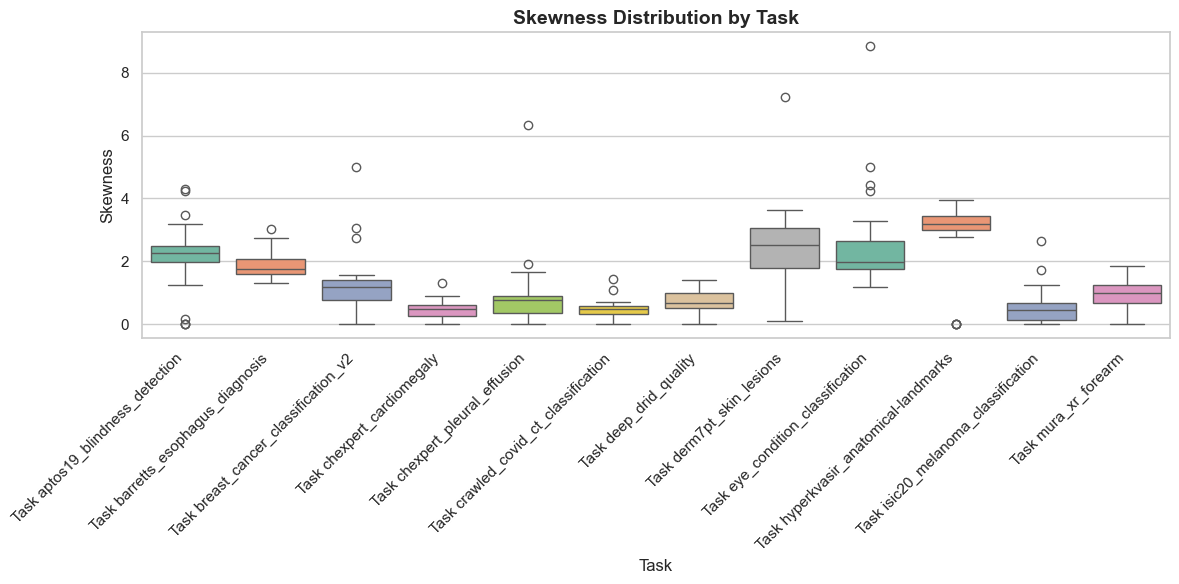

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure clean plot settings
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Boxplot of skewness per task
ax = sns.boxplot(x='Task', y='Skew', data=df_long, palette='Set2')

# Optional: rotate task names for readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Titles and labels
plt.title('Skewness Distribution by Task', fontsize=14, fontweight='bold')
plt.xlabel('Task', fontsize=12)
plt.ylabel('Skewness', fontsize=12)
plt.tight_layout()
plt.show()


In [39]:
import pandas as pd

# Assume your DataFrame is called `df`
# Step 1: Identify the skew columns
skew_cols = [col for col in data.columns if 'Kurt' in col]

# Step 2: Extract task names from skew column names
task_names = [col.split('Kurt')[0].strip() for col in skew_cols]

# Step 3: Create a long DataFrame
df_long = pd.DataFrame()

for task, col in zip(task_names, skew_cols):
    temp_df = pd.DataFrame({
        'Task': task,
        'Kurt': data[col]
    })
    df_long = pd.concat([df_long, temp_df], ignore_index=True)

# Optional: sort by task name
df_long = df_long.sort_values('Task').reset_index(drop=True)
print(df_long)

                                 Task       Kurt
0    Task aptos19_blindness_detection  34.488685
1    Task aptos19_blindness_detection  43.411248
2    Task aptos19_blindness_detection  53.469257
3    Task aptos19_blindness_detection  49.513002
4    Task aptos19_blindness_detection  61.192653
..                                ...        ...
307              Task mura_xr_forearm  10.871396
308              Task mura_xr_forearm  14.863229
309              Task mura_xr_forearm  16.650898
310              Task mura_xr_forearm  10.013722
311              Task mura_xr_forearm  16.749471

[312 rows x 2 columns]


/var/folders/4w/1glyl09x27jfg8kpgbdzrwv40000gp/T/ipykernel_61931/3201612294.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Task', y='Kurt', data=df_long, palette='Set2')
/var/folders/4w/1glyl09x27jfg8kpgbdzrwv40000gp/T/ipykernel_61931/3201612294.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


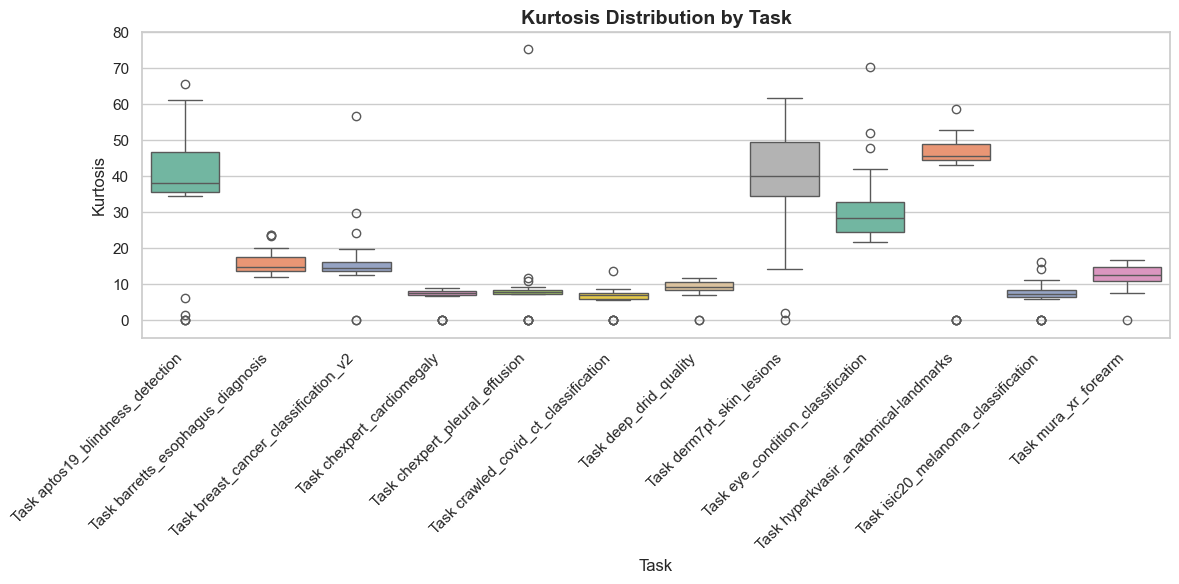

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure clean plot settings
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Boxplot of skewness per task
ax = sns.boxplot(x='Task', y='Kurt', data=df_long, palette='Set2')

# Optional: rotate task names for readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Titles and labels
plt.title('Kurtosis Distribution by Task', fontsize=14, fontweight='bold')
plt.xlabel('Task', fontsize=12)
plt.ylabel('Kurtosis', fontsize=12)
plt.tight_layout()
plt.ylim(-5, 80)
plt.show()


In [41]:
import pandas as pd

# Step 1: Identify relevant wide columns
value_vars = [col for col in data.columns if 'skew' in col.lower() or 'kurt' in col.lower()]

# Step 2: Melt the data to long format
df_long = data.melt(
    id_vars=['Model name', 'Balanced sampling', 'Augmentation'],
    value_vars=value_vars,
    var_name='Task_Stat',
    value_name='Value'
)

# Step 3: Extract Task and Statistic type (Skew/Kurt)
df_long[['Task', 'Statistic']] = df_long['Task_Stat'].str.extract(r'Task\s*(.*?)\s+(Skew|Kurt)', expand=True)

# Step 4: Optional — keep only needed columns (if you want tidy format for plotting)
df_long = df_long[['Model name', 'Balanced sampling', 'Augmentation', 'Task', 'Statistic', 'Value']]


In [42]:
df_long

,Model name,Balanced sampling,Augmentation,Task,Statistic,Value
0,vit_huge_patch14_clip_224.laion2b_ft_in12k_in1k,True,ImageNetAA,chexpert_cardiomegaly,Skew,0.281574
1,vit_huge_patch14_clip_224.laion2b_ft_in12k_in1k,True,ImageNetAA,chexpert_cardiomegaly,Skew,0.739191
2,vit_huge_patch14_clip_224.laion2b_ft_in12k_in1k,True,ImageNetAA,chexpert_cardiomegaly,Skew,0.882587
3,vit_huge_patch14_clip_224.laion2b_ft_in12k_in1k,True,RandAugment,chexpert_cardiomegaly,Skew,0.000029
4,vit_huge_patch14_clip_224.laion2b_ft_in12k_in1k,True,RandAugment,chexpert_cardiomegaly,Skew,0.588838
...,...,...,...,...,...,...
619,convnextv2_large.fcmae_ft_in22k_in1k,True,RandAugment,hyperkvasir_anatomical-landmarks,Kurt,45.364500
620,convnextv2_large.fcmae_ft_in22k_in1k,True,RandAugment,hyperkvasir_anatomical-landmarks,Kurt,45.390247
621,convnextv2_large.fcmae_ft_in22k_in1k,False,ShiftScaleRotate,hyperkvasir_anatomical-landmarks,Kurt,46.145382
622,convnextv2_large.fcmae_ft_in22k_in1k,False,ShiftScaleRotate,hyperkvasir_anatomical-landmarks,Kurt,45.588321


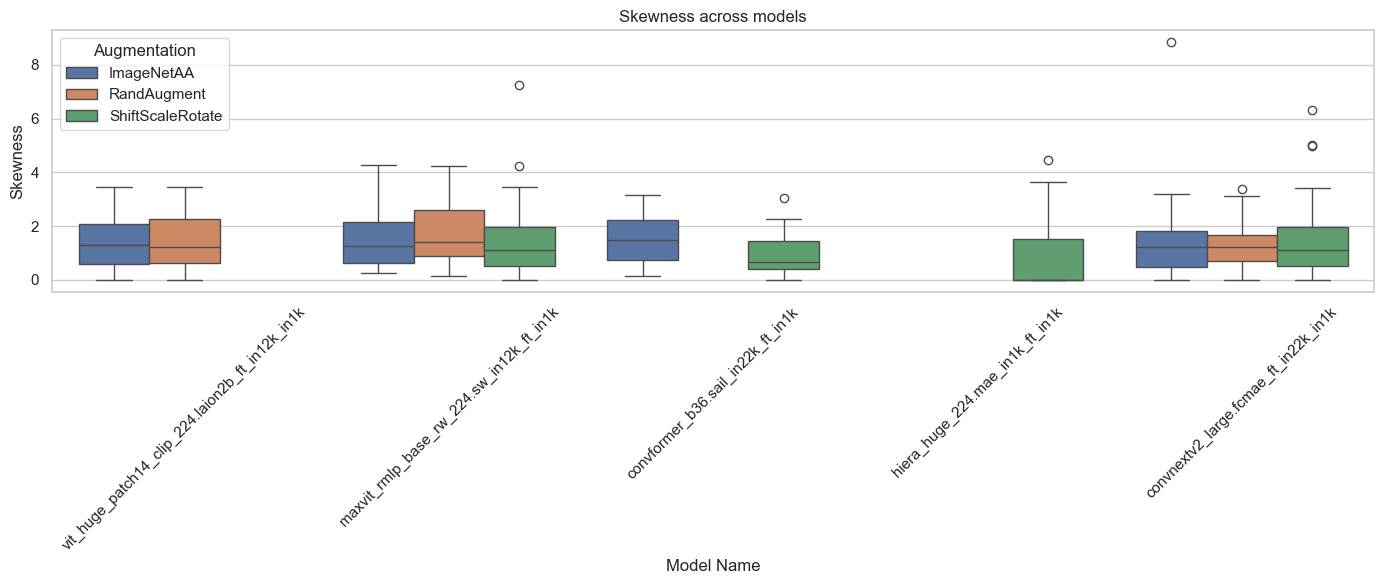

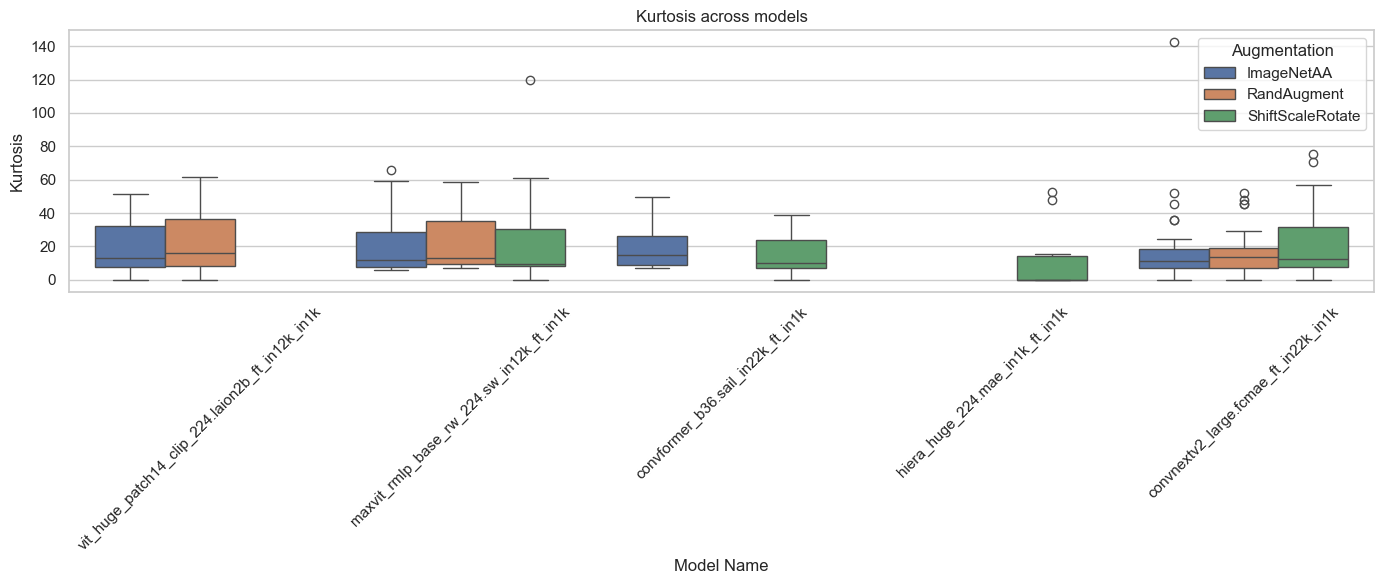

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Skewness by model_name
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_long[df_long['Statistic'] == 'Skew'], 
            x='Model name', y='Value', hue='Augmentation')  # or 'augmentation'
plt.title("Skewness across models")
plt.ylabel("Skewness")
plt.xlabel("Model Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Kurtosis by model_name
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_long[df_long['Statistic'] == 'Kurt'], 
            x='Model name', y='Value', hue='Augmentation')  # or 'balanced_sampling'
plt.title("Kurtosis across models")
plt.ylabel("Kurtosis")
plt.xlabel("Model Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


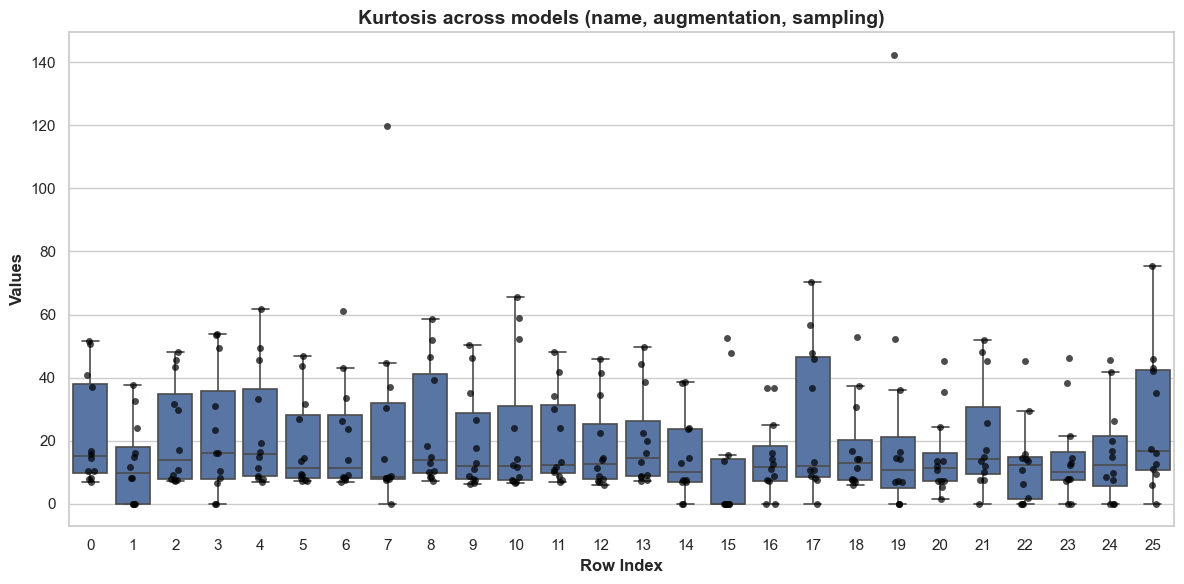

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties



# Melt data: each row's values become multiple rows for plotting
melted = df_kurt.reset_index().melt(id_vars='index', var_name='Column', value_name='Value')


plt.figure(figsize=(12, 6))

# Boxplot by row index
sns.boxplot(x='index', y='Value', data=melted, showfliers=False, linewidth=1.2)

# Stripplot with all points same color (e.g. black), no legend
sns.stripplot(x='index', y='Value', data=melted, 
              jitter=True, alpha=0.7, color='black', dodge=False)

plt.xlabel('Row Index', fontweight='bold')
plt.ylabel('Values', fontweight='bold')
plt.title('Kurtosis across models (name, augmentation, sampling)', fontweight='bold', fontsize=14)

plt.legend([],[], frameon=False)  # Remove legend explicitly

plt.tight_layout()
plt.show()